In [1]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score ,mean_absolute_error,root_mean_squared_error

In [2]:
#import and show data
df=pd.read_csv('test.csv')
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [3]:
#display data types and dataset shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [4]:
#extract name and model of name field by regex
x=list(df['name'])
df['name']=df['name'].str.extract(r'^(\w+\s+\w+)')
df[['name']].head(5)

,name
0,Maruti 800
1,Maruti Wagon
2,Hyundai Verna
3,Datsun RediGO
4,Honda Amaze


In [5]:
#encode feature
le=LabelEncoder()
df['name']=le.fit_transform(df['name'])
df['fuel']=le.fit_transform(df['fuel'])
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,97,2007,60000,70000,4,Individual,Manual,First Owner
1,116,2007,135000,50000,4,Individual,Manual,First Owner
2,69,2012,600000,100000,1,Individual,Manual,First Owner
3,27,2017,250000,46000,4,Individual,Manual,First Owner
4,47,2014,450000,141000,1,Individual,Manual,Second Owner


In [6]:
#use mean price for each name instead of name and convert to int
meann=df.groupby('name')['selling_price'].mean()
df['mean_price_for_each_name']=df['name'].map(meann)
df['mean_price_for_each_name']=df['mean_price_for_each_name'].astype(int)
df['mean_price_for_each_name'].head()

0     83211
1    222499
2    550961
3    256333
4    518775
Name: mean_price_for_each_name, dtype: int64

In [7]:
#select features and convert to array
x=df[['mean_price_for_each_name','year','km_driven','fuel']].values
y=df[['selling_price']].values

In [8]:
#standard data
std=StandardScaler()
x=std.fit_transform(x)

In [9]:
#log y
y=np.log(y)

In [10]:
#split data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
#create regression model and predict and print model evaluation
reg=LinearRegression().fit(x_train,y_train)
y_predict=reg.predict(x_test)
print('r2_score :',r2_score(y_test,y_predict))
print('mean_absolute_error :',mean_absolute_error(y_test,y_predict))
print('root_mean_squared_error :',root_mean_squared_error(y_test,y_predict))

r2_score : 0.7732792332903267
mean_absolute_error : 0.2755219018037376
root_mean_squared_error : 0.3954193938667623


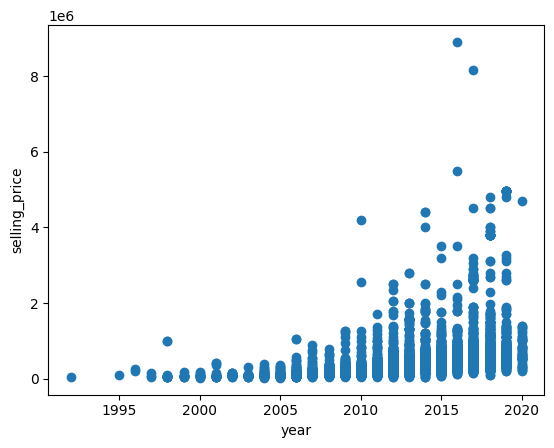

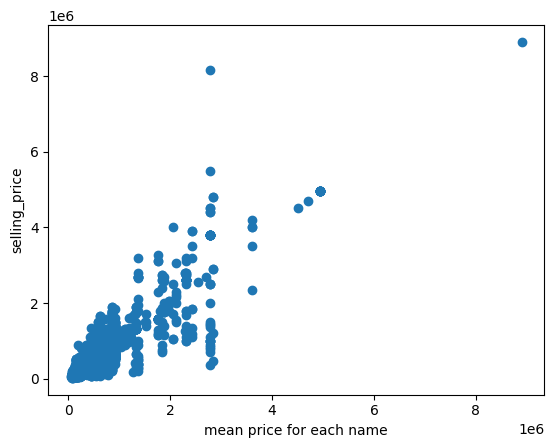

In [12]:
#show important feature of data
plt.scatter(df['year'],df['selling_price'])
plt.xlabel('year')
plt.ylabel('selling_price')
plt.show()
plt.scatter(df['mean_price_for_each_name'],df['selling_price'])
plt.xlabel('mean price for each name')
plt.ylabel('selling_price')
plt.show()

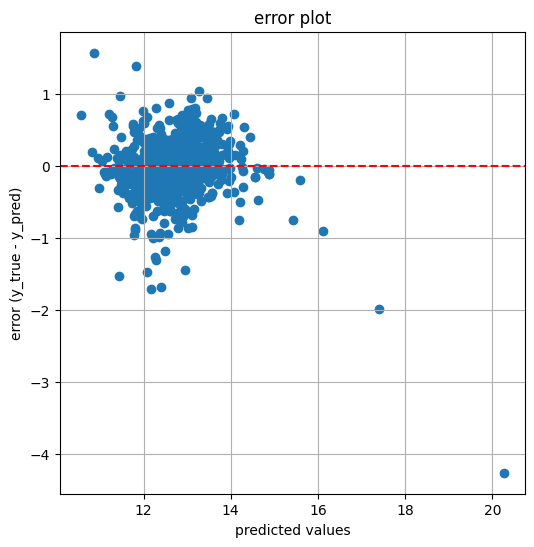

In [13]:
#show error of predicts and predicted values
error=y_test-y_predict
plt.figure(figsize=(6,6))
plt.scatter(y_predict, error)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('predicted values')
plt.ylabel('error (y_true - y_pred)')
plt.title('error plot')
plt.grid(True)
plt.show()

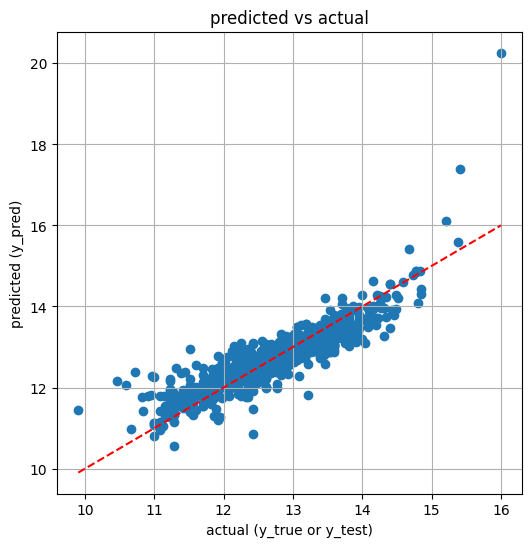

In [14]:
#show predicted values and true values
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_predict)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--') 
plt.xlabel('actual (y_true or y_test)')
plt.ylabel('predicted (y_pred)')
plt.title('predicted vs actual')
plt.grid(True)
plt.show()

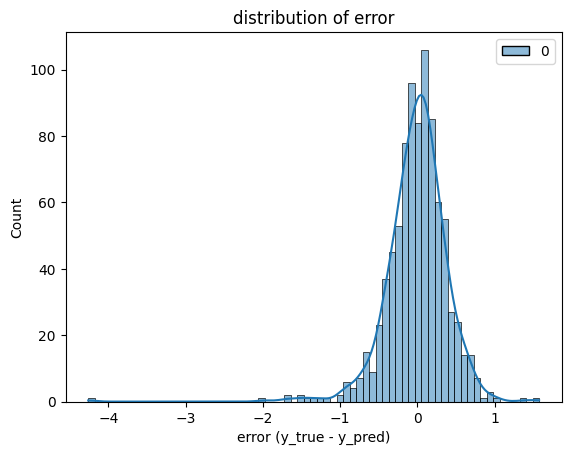

In [15]:
#show histplot of data
sns.histplot(error, kde=True)
plt.title("distribution of error")
plt.xlabel("error (y_true - y_pred)")
plt.show()